In [1]:
# Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

# Import Qiskit classes 
import qiskit
from qiskit import assemble, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

# Import Backends
from quantuminspire.qiskit import QI

# Import utils
import sys 
sys.path.append('..')
import utils as u
import time

/tmp/ipykernel_318907/756746230.py:7: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  import qiskit.ignis.verification.randomized_benchmarking as rb


In [2]:
u.set_auth('../credentials/auth.json')

In [3]:
QI.backends()

[<QuantumInspireBackend('Spin-2')>,
 <QuantumInspireBackend('Starmon-5')>,
 <QuantumInspireBackend('QX-34-L')>,
 <QuantumInspireBackend('QX single-node simulator')>]

In [12]:
# Generate single qubit RB circuits (1Q RB)
def single_qubit_rb(qb_num, shots):
    # number of qubits
    nQ = 1
    nseeds = 10
    nCliffs = np.arange(1,200,20)
    rb_pattern = [[qb_num]]
    length_multiplier = [3]

    rb_opts = {}
    rb_opts['length_vector'] = nCliffs
    rb_opts['nseeds'] = nseeds
    rb_opts['rb_pattern'] = rb_pattern
    rb_opts['length_multiplier'] = length_multiplier
    rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)
    
    backend = QI.get_backend('Starmon-5')
    basis_gates = ['rx', 'ry']
    
    job_list = []
    transpile_list = []
    
    print("Qubit %d" % qb_num) 
    for rb_seed,rb_circ_seed in enumerate(rb_circs):
        print('Compiling seed %d'%rb_seed)
        rb_circ_transpile = qiskit.transpile(rb_circ_seed, basis_gates=basis_gates)
        transpile_list.append(rb_circ_transpile)
        print('Submitting seed %d'%rb_seed)
        job = qiskit.execute(rb_circ_transpile, shots=shots, backend=backend, backend_options={'max_parallel_experiments': 0})
        job_list.append(job)
    print("Finished Submission")
    
    return job_list


In [9]:
# Generate single qubit RB circuits (1Q RB)
def double_qubit_rb(qb_pair, shots):
    # number of qubits
    nQ = 2
    nseeds = 10
    nCliffs = np.arange(1,200,20)
    rb_pattern = [[qb_pair]]
    length_multiplier = [1]

    rb_opts = {}
    rb_opts['length_vector'] = nCliffs
    rb_opts['nseeds'] = nseeds
    rb_opts['rb_pattern'] = rb_pattern
    rb_opts['length_multiplier'] = length_multiplier
    rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)
    
    backend = QI.get_backend('Starmon-5')
    basis_gates = ['rx', 'ry', 'cz']
    
    job_list = []
    transpile_list = []
    
    for rb_seed,rb_circ_seed in enumerate(rb_circs):
        print('Compiling seed %d'%rb_seed)
        rb_circ_transpile = qiskit.transpile(rb_circ_seed, basis_gates=basis_gates)
        transpile_list.append(rb_circ_transpile)
        print('Submitting seed %d'%rb_seed)
        job = qiskit.execute(rb_circ_transpile, shots=shots, backend=backend, backend_options={'max_parallel_experiments': 0})
        job_list.append(job)
    print("Finished Submission")
    
    return job_list

In [ ]:
def plot_rb_result():
    for seed_num, data in enumerate(result_list):#range(1,len(result_list)):
        plt.figure(figsize=(15, 6))
        axis = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

        # Add another seed to the data
        rbfit.add_data([data])

        for i in range(2):
            pattern_ind = i

            # Plot the essence by calling plot_rb_data
            rbfit.plot_rb_data(pattern_ind, ax=axis[i], add_label=True, show_plt=False)

            # Add title and label
            axis[i].set_title('%d Qubit RB - after seed %d'%(len(rb_opts['rb_pattern'][i]), seed_num), fontsize=18)

        # Display
        display.display(plt.gcf())

        # Clear display after each seed and close
        display.clear_output(wait=True)
        time.sleep(1.0)
        plt.close()

Compiling seed 0
Simulating seed 0


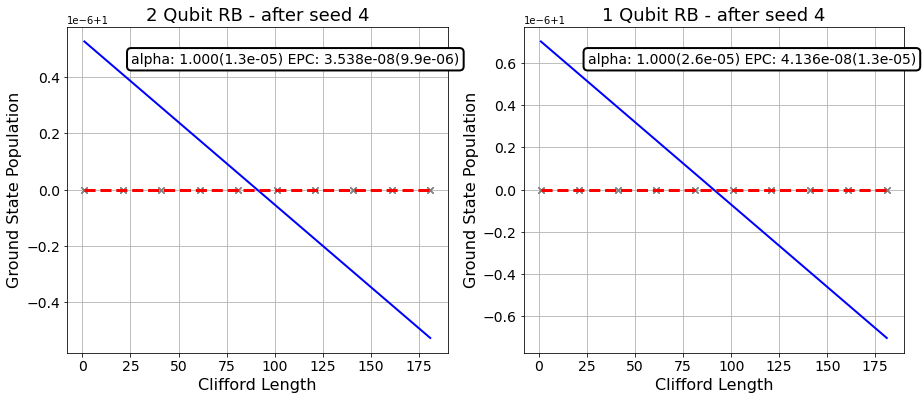

In [202]:
rbfit = rb.fitters.RBFitter(result_list[0], xdata, rb_opts['rb_pattern'])

for seed_num, data in enumerate(result_list):#range(1,len(result_list)):
    plt.figure(figsize=(15, 6))
    axis = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    # Add another seed to the data
    rbfit.add_data([data])

    for i in range(2):
        pattern_ind = i

        # Plot the essence by calling plot_rb_data
        rbfit.plot_rb_data(pattern_ind, ax=axis[i], add_label=True, show_plt=False)

        # Add title and label
        axis[i].set_title('%d Qubit RB - after seed %d'%(len(rb_opts['rb_pattern'][i]), seed_num), fontsize=18)

    # Display
    display.display(plt.gcf())

    # Clear display after each seed and close
    display.clear_output(wait=True)
    time.sleep(1.0)
    plt.close()